In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [38]:
churn = pd.read_csv('data/cleaned_churn.csv', index_col = 0)
churn['signup_date'] = pd.to_datetime(churn['signup_date'])
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])

In [39]:
churn.head()
churn['retention']
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                40000 non-null  float64       
 1   avg_rating_by_driver    40000 non-null  float64       
 2   avg_rating_of_driver    40000 non-null  float64       
 3   avg_surge               40000 non-null  float64       
 4   last_trip_date          40000 non-null  datetime64[ns]
 5   signup_date             40000 non-null  datetime64[ns]
 6   surge_pct               40000 non-null  float64       
 7   trips_in_first_30_days  40000 non-null  int64         
 8   luxury_car_user         40000 non-null  bool          
 9   weekday_pct             40000 non-null  float64       
 10  retention               40000 non-null  bool          
 11  rating_by_driver?       40000 non-null  bool          
 12  rating_of_driver?       40000 non-null  bool  

In [41]:
X = churn.drop('retention',axis=1)
X = X.drop('last_trip_date',axis=1)
X = X.drop('signup_date',axis=1)
y = churn['retention']
X.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'rating_by_driver?', 'rating_of_driver?', 'King's Landing',
       'Winterfell', 'Android', 'iPhone'],
      dtype='object')

Feature #0: avg_dist, Score: 0.29977796903502507
Feature #1: avg_rating_by_driver, Score: 0.10940844267320009
Feature #2: avg_rating_of_driver, Score: 0.07047895716175374
Feature #3: avg_surge, Score: 0.06927725857030959
Feature #4: surge_pct, Score: 0.08292960227797312
Feature #5: trips_in_first_30_days, Score: 0.08013858160502824
Feature #6: luxury_car_user, Score: 0.03182962055024575
Feature #7: weekday_pct, Score: 0.1326951572611288
Feature #8: rating_by_driver?, Score: 0.0010682160664630346
Feature #9: rating_of_driver?, Score: 0.007579509585845687
Feature #10: King's Landing, Score: 0.05959067643481321
Feature #11: Winterfell, Score: 0.015011089290154388
Feature #12: Android, Score: 0.020318056107900734
Feature #13: iPhone, Score: 0.01989686338015868


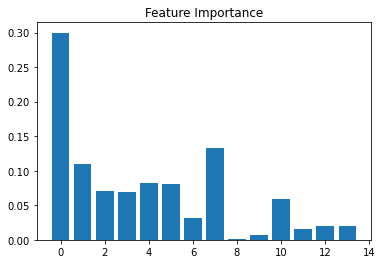

In [44]:
# random forest for feature importance on a regression problem
# from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
basic_rf = RandomForestClassifier()
# fit the model
basic_rf.fit(X, y)
# get importance
importance = basic_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature #{i}: {X.columns[i]}, Score: {v}')
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Feature Importance')
pyplot.show();

In [45]:
churn.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,retention,rating_by_driver?,rating_of_driver?,King's Landing,Winterfell,Android,iPhone
avg_dist,1.000000,8.137975e-02,3.045004e-02,-0.079488,-0.102349,-0.135228,0.025824,0.097445,-0.093371,6.096881e-03,1.289767e-01,0.013527,0.031272,0.019800,-0.023702
avg_rating_by_driver,0.081380,1.000000e+00,9.776183e-02,0.007777,0.018709,-0.039264,0.010283,0.021471,-0.027415,-3.371841e-14,6.388280e-03,0.082850,-0.099898,0.004643,-0.005777
avg_rating_of_driver,0.030450,9.776183e-02,1.000000e+00,-0.027851,-0.008782,-0.013426,0.001615,0.011373,-0.011982,-6.773953e-03,-4.757892e-14,0.086001,-0.095195,0.027814,-0.028006
avg_surge,-0.079488,7.777412e-03,-2.785072e-02,1.000000,0.793842,-0.001829,-0.075544,-0.113054,-0.003146,3.041700e-02,8.649673e-03,-0.007347,-0.028452,-0.009684,0.011530
surge_pct,-0.102349,1.870877e-02,-8.781662e-03,0.793842,1.000000,0.004746,-0.103531,-0.147969,0.011551,2.619434e-02,-3.615891e-03,0.028099,-0.065744,-0.011386,0.013835
trips_in_first_30_days,-0.135228,-3.926402e-02,-1.342610e-02,-0.001829,0.004746,1.000000,0.114741,0.049731,0.210677,-2.865818e-02,-1.953835e-01,0.022333,0.037260,-0.057818,0.056907
luxury_car_user,0.025824,1.028325e-02,1.615466e-03,-0.075544,-0.103531,0.114741,1.000000,0.033478,0.206902,-2.676381e-02,-3.540289e-02,0.039428,-0.053481,-0.073530,0.064507
weekday_pct,0.097445,2.147074e-02,1.137330e-02,-0.113054,-0.147969,0.049731,0.033478,1.000000,0.008383,-1.339016e-02,-2.329666e-02,0.031314,-0.012731,-0.008750,0.005988
retention,-0.093371,-2.741537e-02,-1.198204e-02,-0.003146,0.011551,0.210677,0.206902,0.008383,1.000000,-2.347170e-02,-1.567501e-01,0.263103,-0.046711,-0.226292,0.227084
rating_by_driver?,0.006097,-3.371841e-14,-6.773953e-03,0.030417,0.026194,-0.028658,-0.026764,-0.013390,-0.023472,1.000000e+00,3.255359e-02,0.000016,0.006778,-0.000699,0.000091


In [49]:
basic_rf = RandomForestClassifier()
scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall'}

In [50]:

from sklearn.model_selection import cross_validate

scores = cross_validate(basic_rf, X, y, scoring=scoring,
                         cv=10, return_train_score=True)
print(scores.keys())
print(scores['test_acc'])  

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec', 'train_prec', 'test_rec', 'train_rec'])
[0.75675 0.75025 0.7595  0.7565  0.76225 0.76675 0.75475 0.76075 0.74575
 0.75825]


In [56]:
print(np.mean(scores['test_acc']))

print(np.mean(scores['test_prec']))  

print(np.mean(scores['test_rec']))  

0.7571500000000001
0.6819445955994825
0.6633189295168529


In [58]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from tqdm import tqdm
tqdm()


/home/aqeelali7/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aqeelali7/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR: 0.724875 (0.002412)
KNN: 0.746950 (0.004508)
CART: 0.705050 (0.003400)
SVM: 0.731425 (0.003872)


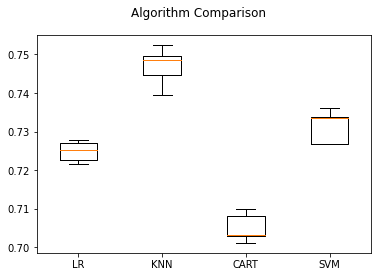

In [62]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/home/aqeelali7/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aqeelali7/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR: 0.678946 (0.006386)
KNN: 0.680786 (0.008784)
CART: 0.609792 (0.010020)


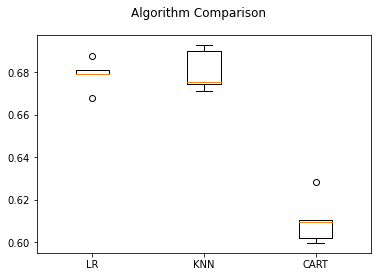

In [63]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()